In [751]:
import numpy as np
import pandas as pd
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns

In [752]:
predictor = pd.read_csv('Default_Fin.csv')
predictor.head(5)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [753]:
predictor.drop(['Index'],inplace=True,axis=1)

In [754]:
predictor.head(5)

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [755]:
predictor.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


In [756]:
predictor.corr()

,Employed,Bank Balance,Annual Salary,Defaulted?
Employed,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.035420,0.350119,-0.019871,1.000000


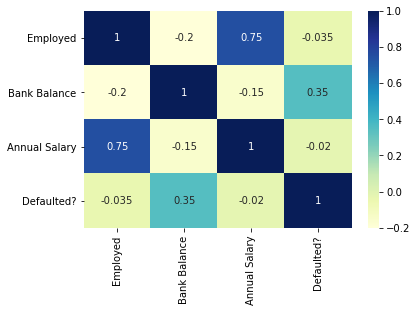

In [757]:
corr_map = sns.heatmap(predictor.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### The bank balance maintained by the individual is highly correlated to the probaility of the loan default.

In [758]:
X = predictor.iloc[:,:-1]
y= predictor.iloc[:,-1]

In [759]:
X.head(5)

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00


In [760]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Defaulted?, dtype: int64

In [761]:
y.value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

## Balancing the datasets using SMOTE over_sampling and random under sampling 

#### By using SMOTE technique alone to oversample the class '1' of the target variable i.e., defaulted, we are making our model learn more of the records of 'default', where in real world scenario the cases of default are less compared to the cases of non default. This makes the model take equal probaility of occurence of default and non default cases, there by resulting in wrong prediction. In this dataset, at first we are trying to oversample the minority class i.e., deafult class to 20% of the majority class which is non default. Then we are trying to under sample the majority class by making them 60% more than the minority class. In this way, we are avoiding the scenario of having equal number of deafult class and non default class.

In [762]:
#   !pip install imbalanced-learn

In [763]:
import imblearn

In [764]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [765]:
oversample = SMOTE(sampling_strategy = 0.2)
undersample = RandomUnderSampler(sampling_strategy = 0.6)
steps = [['o',oversample],['u',undersample]]
pipeline = Pipeline(steps = steps)

In [766]:
X,y = pipeline.fit_resample(X,y)

In [767]:
y.value_counts()

0    3221
1    1933
Name: Defaulted?, dtype: int64

## Creating the model 

### Using LogisticRegression 

In [768]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [769]:
from sklearn.linear_model import LogisticRegression

In [770]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [771]:
y_pred= logreg.predict(X_test)

In [772]:
from sklearn.metrics import confusion_matrix, classification_report

In [773]:
confusion_matrix(y_pred,y_test)

array([[499,  83],
       [160, 289]], dtype=int64)

In [774]:
print(classification_report(y_pred, y_test,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.76      0.86      0.80       582
     Class 1       0.78      0.64      0.70       449

    accuracy                           0.76      1031
   macro avg       0.77      0.75      0.75      1031
weighted avg       0.77      0.76      0.76      1031



### Using DecisionTreeClassifier 

In [775]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [776]:
dt_model = DecisionTreeClassifier().fit(X_train,y_train)

In [777]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)
scores = cross_val_score(dt_model, X_train,y_train, scoring = 'roc_auc', cv =cv, n_jobs = -1)
print('Mean of ROC AUC score is % .4f' % mean(scores))

Mean of ROC AUC score is  0.8596


In [778]:
y_pred= dt_model.predict(X_test)

In [779]:
confusion_matrix(y_pred,y_test)

array([[594,  53],
       [ 65, 319]], dtype=int64)

In [780]:
print(classification_report(y_pred, y_test,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.90      0.92      0.91       647
     Class 1       0.86      0.83      0.84       384

    accuracy                           0.89      1031
   macro avg       0.88      0.87      0.88      1031
weighted avg       0.89      0.89      0.89      1031



### From the above two algorithms applied, we can observe that the accuracy of the model has reached to nearly 89 % in the DecisionTreeClassifier algorithm which is higher comapred to accuracy of 77% in the case of LogisticRegression